<a href="https://colab.research.google.com/github/heyimknny/DS2002/blob/main/python/superhero_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superhero Database Assignment (SQLite & Google Colab)

## Objective
In this assignment, you will design and implement a **Superhero Database** using SQLite in Google Colab. This database will store superheroes, villains, and their battles. You will write SQL queries to analyze battle outcomes and relationships between heroes and villains.

### Group Size:
- 2 to 3 students per group.

### Tools Required:
- **Google Colab**
- **SQLite (built into Python)**
- **CSV files (provided for import)**

## Step 1: Setting Up Your SQLite Database

### Tasks:
1. Initialize SQLite in Google Colab.
2. Create a database named `superhero_db.sqlite`.
3. Define the database schema, ensuring it includes the following tables:
   - `heroes`: Stores superhero names, powers, and teams.
   - `villains`: Stores villains and their evil plans.
   - `battles`: Tracks battles between heroes and villains, including the outcome.
4. Implement primary keys and foreign keys where appropriate.

✅ **Checkpoint:** Ensure that the database and tables have been successfully created.

In [ ]:
import sqlite3

# Connect to an in-memory SQLite database
conn = sqlite3.connect('superhero_db.sqlite')
cursor = conn.cursor()

# DDL statements (using SQLite syntax)
ddl_statements = '''
DROP TABLE IF EXISTS heroes;
DROP TABLE IF EXISTS villains;
DROP TABLE IF EXISTS battles;

CREATE TABLE heroes (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name VARCHAR(50) NOT NULL,
    power VARCHAR(50) NOT NULL,
    team VARCHAR(50) NOT NULL
);

CREATE TABLE villains (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name VARCHAR(50) NOT NULL,
    evil_plan VARCHAR(100) NOT NULL
);

CREATE TABLE battles (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    hero_id INTEGER NOT NULL,
    villain_id INTEGER NOT NULL,
    outcome VARCHAR(50) NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES heroes(id),
    FOREIGN KEY (villain_id) REFERENCES villains(id)
);

'''

# Execute the DDL script
cursor.executescript(ddl_statements)
conn.commit()
print('Database schema created successfully.')

Database schema created successfully.


## Step 2: Import Data from CSV Files

### Tasks:
1. Download the provided CSV files.
2. Upload them to Google Colab.
3. Write a script to import data from these files into the appropriate tables.
4. Verify that the data has been successfully inserted.

✅ **Checkpoint:** Ensure that each table contains the expected data from the CSV files.

In [ ]:
import pandas as pd

df_heroes = pd.read_csv('heroes.csv')
df_villains = pd.read_csv('villains.csv')
df_battles = pd.read_csv('battles.csv')
print(df_heroes.head())
print(df_villains.head())
print(df_battles.head())

   id        name             power            team
0   1  Spider-Man      Web-slinging        Avengers
1   2    Iron Man     Powered Armor        Avengers
2   3      Batman  Genius Detective  Justice League
3   4    Superman    Super Strength  Justice League
4   5        Thor    God of Thunder        Avengers
   id          name                           evil_plan
0   1  Green Goblin                  Terrorize New York
1   2        Thanos         Collect all Infinity Stones
2   3         Joker              Spread chaos in Gotham
3   4    Lex Luthor                     Defeat Superman
4   5          Loki  Trick humanity into worshiping him
   id  hero_id  villain_id       outcome
0   1        1          10  Villain Wins
1   2        9           3     Hero Wins
2   3        8           1          Draw
3   4        5           4  Villain Wins
4   5        1           7     Hero Wins


In [ ]:

df_heroes.to_sql('heroes', conn, if_exists='replace', index=False)
print("Data from heroes.csv has been inserted into the sales table.")

df_villains.to_sql('villains', conn, if_exists='replace', index=False)
print("Data from villains.csv has been inserted into the sales table.")

df_battles.to_sql('battles', conn, if_exists='replace', index=False)
print("Data from battles.csv has been inserted into the sales table.")



Data from heroes.csv has been inserted into the sales table.
Data from villains.csv has been inserted into the sales table.
Data from battles.csv has been inserted into the sales table.


## Step 3: Querying the Database

### Tasks:
Write SQL queries to answer the following:
1. Retrieve all superheroes and their powers.
2. Find all battles where the hero won.
3. List all villains and their evil plans.
4. Determine which superhero has fought the most battles.

✅ **Checkpoint:** Ensure that all queries return meaningful results from the database.

In [ ]:
#Query 1
cursor.execute("SELECT name, power FROM heroes")
rows = cursor.fetchall()
# Display the data
print("Heroes and their Powers:")
for row in rows:
    print(row)

#Query 2
cursor.execute("SELECT * FROM battles WHERE outcome LIKE 'Hero Wins'")
rows = cursor.fetchall()
# Display the data
print("\nBattles where Heroes Win:")
for row in rows:
    print(row)

#Query 3
cursor.execute("SELECT name, evil_plan FROM villains")
rows = cursor.fetchall()
# Display the data
print("\nVillains and their Evil Plans:")
for row in rows:
    print(row)

#Query 4
cursor.execute("""SELECT h.name, COUNT(b.id) AS battle_count
FROM heroes h JOIN battles b ON h.id = b.hero_id
GROUP BY h.id
ORDER BY battle_count DESC
LIMIT 1
""")
rows = cursor.fetchall()

# Display the data
print("\nSuperhero with the Most Battles:")
for row in rows:
    print(row)

Heroes and their Powers:
('Spider-Man', 'Web-slinging')
('Iron Man', 'Powered Armor')
('Batman', 'Genius Detective')
('Superman', 'Super Strength')
('Thor', 'God of Thunder')
('Wonder Woman', 'Amazonian Strength')
('Black Panther', 'Enhanced Agility')
('The Flash', 'Super Speed')
('Hulk', 'Super Strength')
('Doctor Strange', 'Mystic Arts')

Battles where Heroes Win:
(2, 9, 3, 'Hero Wins')
(5, 1, 7, 'Hero Wins')
(7, 9, 8, 'Hero Wins')
(8, 3, 2, 'Hero Wins')
(9, 7, 5, 'Hero Wins')
(13, 8, 9, 'Hero Wins')
(20, 3, 4, 'Hero Wins')
(29, 3, 5, 'Hero Wins')
(30, 5, 5, 'Hero Wins')

Villains and their Evil Plans:
('Green Goblin', 'Terrorize New York')
('Thanos', 'Collect all Infinity Stones')
('Joker', 'Spread chaos in Gotham')
('Lex Luthor', 'Defeat Superman')
('Loki', 'Trick humanity into worshiping him')
('Ultron', 'AI world domination')
('Darkseid', 'Control the universe')
('Venom', 'Consume Spider-Man')
('Magneto', 'Mutant supremacy')
('Red Skull', 'Revive Hydra')

Superhero with the Most 

## Step 4: Add a Custom Feature

### Tasks:
1. Design and implement an additional table related to superheroes or villains.
2. Populate it with data.
3. Write at least one query to retrieve meaningful insights from the new table.

**Examples of Custom Features:**
- Sidekicks for superheroes
- Villain hideouts
- Battle locations
- Superhero equipment

✅ **Checkpoint:** Ensure that the new table and queries function correctly.

In [ ]:
#Create table with the love interests of heroes
newTable = '''
DROP TABLE IF EXISTS loveInterests;

CREATE TABLE loveInterests (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name VARCHAR(50) NOT NULL,
    hero_id INTEGER NOT NULL,
    FOREIGN KEY (hero_id) REFERENCES heroes(id)
);
'''

cursor.executescript(newTable)
conn.commit()
print('Love Interest table created successfully.')


Love Interest table created successfully.


In [ ]:
#Insert data into table

# Extended love interests data with multiple love interests for some heroes
love_interests_data = [
    ("Mary Jane Watson", 1),    # Spider-Man
    ("Black Cat", 1),           # Spider-Man
    ("Silk", 1),                # Spider-Man
    ("Pepper Potts", 2),        # Iron Man
    ("Catwoman", 3),            # Batman
    ("Lois Lane", 4),           # Superman
    ("Jane Foster", 5),         # Thor
    ("Steve Trevor", 6),        # Wonder Woman
    ("Christine Palmer", 10),   # Doctor Strange
    ("Nakia", 7)                 # Black Panther
]

cursor.executemany('''
    INSERT INTO loveInterests (name, hero_id)
    VALUES (?, ?)
''', love_interests_data)

conn.commit()
print("Love interests data inserted successfully.")

Love interests data inserted successfully.


In [ ]:
# Query 1: Select all love interests
cursor.execute("""SELECT l.name, h.name
FROM loveInterests l JOIN heroes h ON l.hero_id = h.id
ORDER BY h.name;
""")
rows = cursor.fetchall()
# Display the data
print("\nLove Interests and their Hero:")
for row in rows:
    print(row)

# Query 2: Select all love interests of Spiderman
cursor.execute("""SELECT l.name FROM loveInterests l JOIN heroes h ON l.hero_id = h.id
WHERE h.name LIKE 'Spider-Man';
""")
rows = cursor.fetchall()
# Display the data
print("\nLove Interests of Spider-Man:")
for row in rows:
    print(row)

# Query 3: Select all HEROES WITHOUT a love interest
cursor.execute("""SELECT h.id, h.name
FROM heroes h LEFT JOIN loveInterests l ON h.id = l.hero_id
WHERE l.id IS NULL;
""")
rows = cursor.fetchall()
# Display the data
print("\nHeroes without a love interest:")
for row in rows:
    print(row)


Love Interests and their Hero:
('Catwoman', 'Batman')
('Nakia', 'Black Panther')
('Christine Palmer', 'Doctor Strange')
('Pepper Potts', 'Iron Man')
('Mary Jane Watson', 'Spider-Man')
('Black Cat', 'Spider-Man')
('Silk', 'Spider-Man')
('Lois Lane', 'Superman')
('Jane Foster', 'Thor')
('Steve Trevor', 'Wonder Woman')

Love Interests of Spider-Man:
('Black Cat',)
('Mary Jane Watson',)
('Silk',)

Heroes without a love interest:
(8, 'The Flash')
(9, 'Hulk')


## Bonus Challenge (+5 Points)

### Tasks:
1. Enhance your project by adding a visual or interactive component.

**Options:**
- Visualize battles using Matplotlib (e.g., a bar chart showing how many battles each superhero has fought).
- Make it interactive (e.g., allow users to input a superhero name and display their battles).

✅ **Checkpoint:** If attempting the bonus, ensure that your visualization or interactive component works correctly.

Text(0, 0.5, 'Number of Battles')

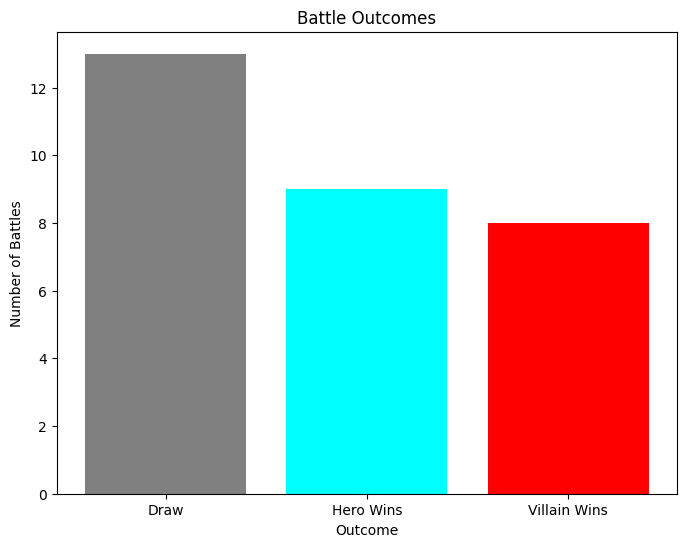

In [ ]:
import matplotlib.pyplot as plt

# Bar chart for overall outcomes of all battles
battleOutcomes= """SELECT outcome, COUNT(*) AS count FROM battles
GROUP BY outcome;
"""

df_outcomes = pd.read_sql_query(battleOutcomes, conn)

plt.figure(figsize=(8,6))
plt.bar(df_outcomes['outcome'], df_outcomes['count'], color=['gray', 'cyan', 'red'])
plt.title('Battle Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Battles')

## Submission Guidelines

Each group must submit a **Google Colab Notebook (.ipynb)** containing:
- ✅ **Database schema (DDL)**
- ✅ **CSV imports & data insertion (DML)**
- ✅ **SQL queries & results**
- ✅ **Custom feature (bonus if applicable)**

## Grading Criteria (Total: 25 Points)

| Section                 | Points |
|-------------------------|--------|
| Database Setup          | 5      |
| Data Importing         | 10     |
| Querying the Data      | 10     |
| Extra Feature          | 5      |
| Bonus Challenge (Optional) | +5  |

### Final Notes:
- Be **creative** when designing superheroes and villains.
- **Comment your code** to explain its functionality.
- **Have fun** building your superhero universe!